In [123]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

numpy.seterr(divide = 'ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [124]:
df = pd.read_pickle('bikeshare.pkl')
df = df.reset_index().dropna()

In [125]:
df.columns

Index(['index', 'Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'ideal_temp',
       'dist_from_ideal_temp', 'tod'],
      dtype='object')

#### Experiment 0

Bring coefficients to standard scale and transform the target.

In [108]:
X,y = df[['Hour','Temperature(°C)']], df['Rented Bike Count']
X = X.dropna()
y = y.dropna()

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [110]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('ttr',TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log2,
                                        inverse_func=np.exp))])

In [118]:
X_train = X_train[np.logical_not(np.isnan(X_train))]
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train[np.logical_not(np.isnan(y_train))]
y_train = y_train.to_numpy()

In [122]:
y_train.reshape()

47

#### Experiment 1 

Implement model with dist_from_ideal_temp as feature

In [126]:
X,y = df[['Hour','dist_from_ideal_temp']], df['Rented Bike Count']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [128]:
lr = LinearRegression()

In [129]:
model = lr.fit(X_train,y_train)

In [130]:
model.score(X_test,y_test)

0.4073018314459236

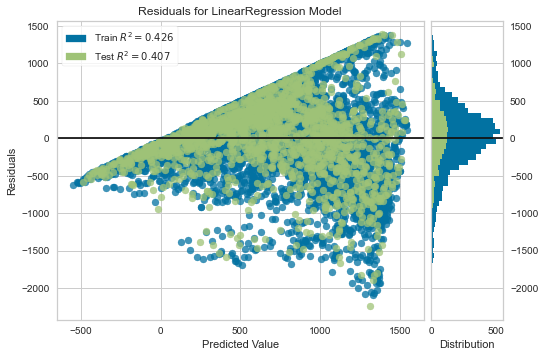

In [131]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()